In [12]:
using LinearAlgebra, Distributions

┌ Info: Precompiling Distributions [31c24e10-a181-5473-b8eb-7969acd0382f]
└ @ Base loading.jl:1278


In [31]:
using Plots

┌ Info: Precompiling Plots [91a5bcdd-55d7-5caf-9e0b-520d859cae80]
└ @ Base loading.jl:1278


In [2]:
#参考 endで閉じる
n=10
for i=(n-1):-1:1
    println(i)
end

9
8
7
6
5
4
3
2
1


In [16]:
T(n,β)=SymTridiagonal(rand(Normal(0,√(2β)),n),[rand(Chi(i*β)) for i=(n-1):-1:1])

T (generic function with 1 method)

In [32]:
# example：real case(β=1)
T(10,1)

10×10 SymTridiagonal{Float64,Array{Float64,1}}:
 1.85381  2.15657    ⋅         ⋅       …   ⋅          ⋅          ⋅ 
 2.15657  0.521804  2.89165    ⋅           ⋅          ⋅          ⋅ 
  ⋅       2.89165   0.347749  2.97803      ⋅          ⋅          ⋅ 
  ⋅        ⋅        2.97803   2.16042      ⋅          ⋅          ⋅ 
  ⋅        ⋅         ⋅        2.40936      ⋅          ⋅          ⋅ 
  ⋅        ⋅         ⋅         ⋅       …   ⋅          ⋅          ⋅ 
  ⋅        ⋅         ⋅         ⋅          3.42761     ⋅          ⋅ 
  ⋅        ⋅         ⋅         ⋅          0.717899   1.27058     ⋅ 
  ⋅        ⋅         ⋅         ⋅          1.27058   -0.25619    0.429052
  ⋅        ⋅         ⋅         ⋅           ⋅         0.429052  -0.262212

In [55]:
n=10000;β=1;
@time F=eigen(T(n,β)/√(β*n))
list=F.values;

 23.727838 seconds (51 allocations: 765.841 MiB, 1.00% gc time)


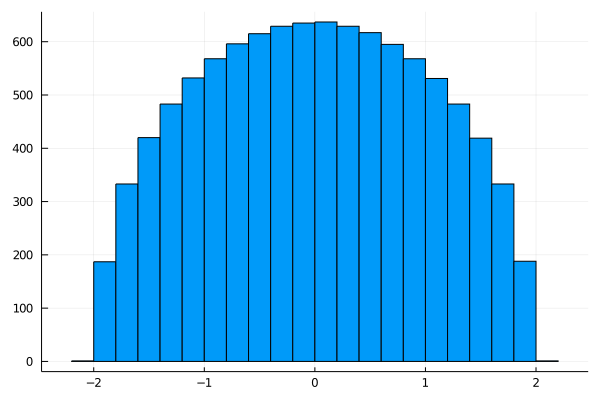

In [56]:
histogram(list,legend=false)